In [1]:
import torch
import torch.nn as nn

import sys
import os

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..')))

from models._model import CBPLTrainer

In [2]:
from utils import shape_utils

In [3]:
config = {
    "peak_regions":"/gladstone/corces/lab/users/vishvak/chrombpnet_tutorial/pd_data/Microglia_peak_set_2.bed",
    "nonpeak_regions":"/gladstone/corces/lab/users/vishvak/chrombpnet_tutorial/own_data/test.chr1.negatives.adjusted.bed",
    "genome_fasta":"/gladstone/corces/lab/users/vishvak/chrombpnet_tutorial/data/downloads/hg38.fa",
    "cts_bw_file":"/gladstone/corces/lab/users/vishvak/chrombpnet_tutorial/pd_data/nd_Microglia_merge.bw",
    "negative_sampling_ratio":0,
    #"train_size": 0.9,
    "batch_size": 32,
    "filters": 64,
    "n_dil_layers": 3,
    "conv1_kernel_size": 21,
    "dilation_kernel_size" : 3,
    "num_tasks": 1,
    "input_seq_len": 5000,
    "out_pred_len": 750,
    "learning_rate": 0.001,
    "dropout_rate" : 0.1,
    "train_chrs" : ["chr1","chr2","chr3","chr4","chr5"],
    "valid_chrs" : ["chr6","chr7"],
    "seq_focus_len" : 500,
    "loss" : "weighted_norm_mse",
    "use_attention_pooling" : False
}

In [4]:
trainer =  CBPLTrainer(config)

Read in bed file of 151351 regions
Read in bed file of 16900 regions
Loaded 151351 peak regions and 0 non-peak regions


In [5]:
for batch in trainer.train_dataloader:
    inputs, targets = batch
    break  
#outputs=trainer.model.forward_test(inputs)

In [7]:
trainer.model

BPNetLightning(
  (eval_metrics): ModuleDict(
    (weighted_norm_mse): WeightedMSELossNorm()
    (weighted_norm_mse_scaled): WeightedMSELossNorm()
    (focused_mse): FocusedMSELoss()
    (mse): MSELoss()
    (kl_divergence): KLDivergence()
    (explained_variance): ExplainedVariance()
    (cosine_similarity): CosineSimilarity()
    (mae): MeanAbsoluteError()
    (r2): R2Score()
  )
  (initial_conv): CNNModule(
    (conv): Conv1d(4, 64, kernel_size=(21,), stride=(1,))
    (activation): ReLU()
  )
  (dilated_convs): ModuleList(
    (0): DilatedConvModule(
      (conv): Conv1d(64, 64, kernel_size=(3,), stride=(1,), dilation=(2,))
      (activation): ReLU()
    )
    (1): DilatedConvModule(
      (conv): Conv1d(64, 64, kernel_size=(3,), stride=(1,), dilation=(4,))
      (activation): ReLU()
    )
    (2): DilatedConvModule(
      (conv): Conv1d(64, 64, kernel_size=(3,), stride=(1,), dilation=(8,))
      (activation): ReLU()
    )
  )
  (crop_layers): ModuleList(
    (0-2): 3 x Cropping1D()

In [7]:
outputs=trainer.model.forward_test(inputs)

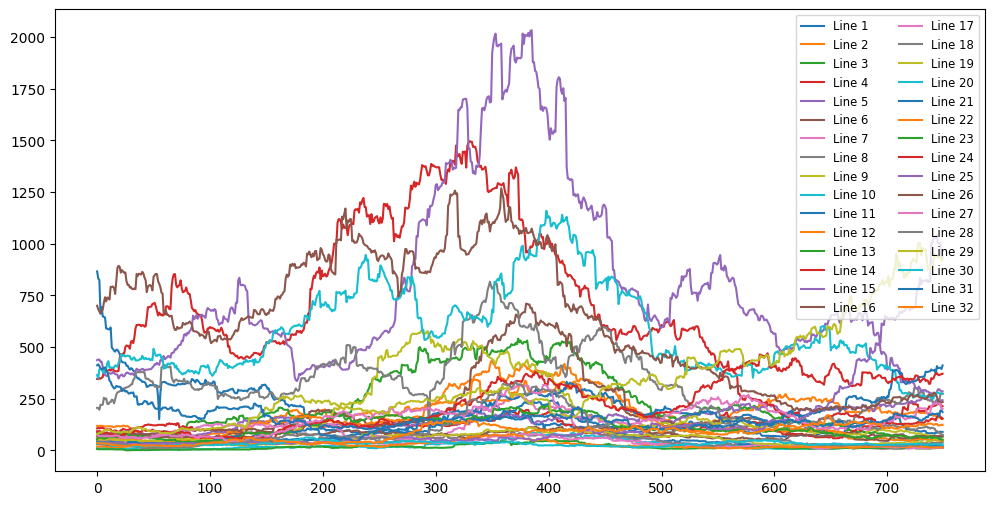

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6)) 
for i in range(targets.shape[0]):
    plt.plot(targets[i].numpy(), label=f'Line {i+1}')  # Convert tensor row to numpy for plotting
plt.legend(loc="upper right", fontsize="small", ncol=2)  # Show legend for all lines
plt.show()

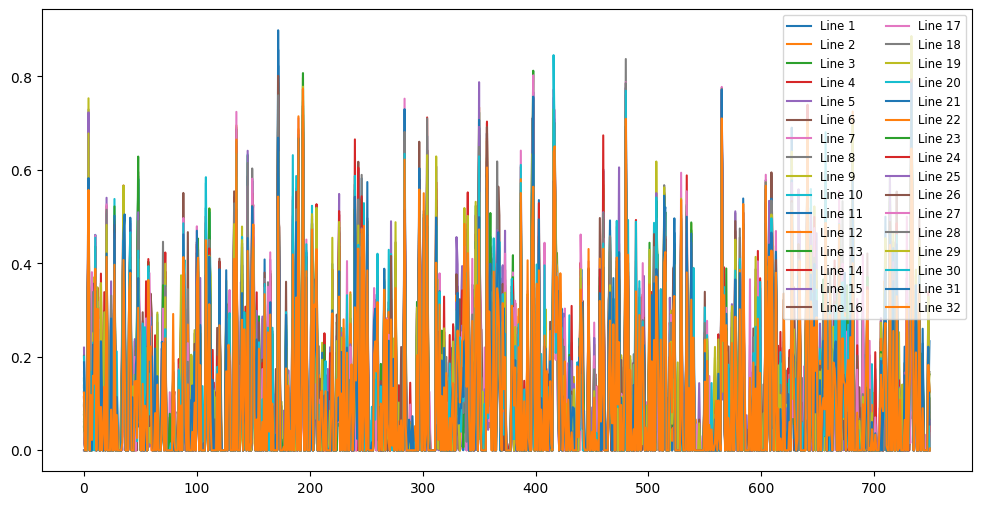

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6)) 
for i in range(outputs.shape[0]):
    plt.plot(outputs[i].detach().numpy(), label=f'Line {i+1}')  # Convert tensor row to numpy for plotting
plt.legend(loc="upper right", fontsize="small", ncol=2)  # Show legend for all lines
plt.show()

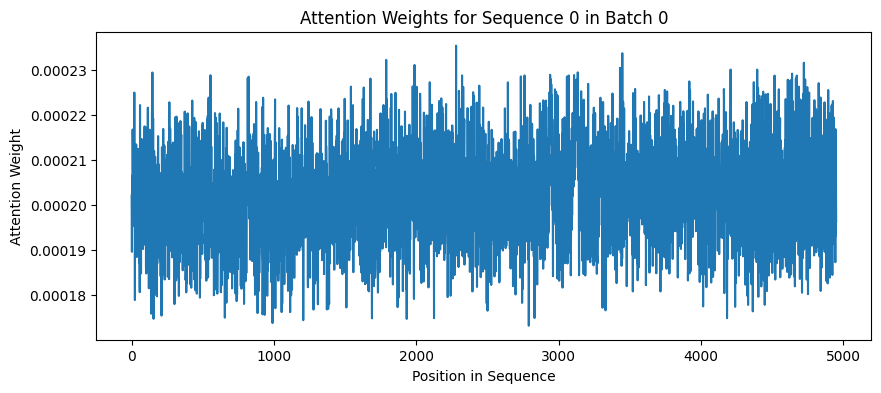

array([0.0002021 , 0.00019563, 0.00018963, ..., 0.00020902, 0.00020126,
       0.0001963 ], dtype=float32)

In [12]:
from utils import attention_utils
attention_utils.visualize_attention(trainer.model)